In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [186]:
# Seaborn styles
sns.set_style("whitegrid")

# Matplotlib figure configuration fonts and figsizes
plt.rcParams.update({
    'font.family':'sans-serif',
    'font.size': 16.0,
    'text.usetex': False,
    'figure.figsize': (11.69,8.27)
})

In [96]:
top_type = "top100"
# top_type = "top100_selection"

In [97]:
movies = pd.read_csv(top_type + "/movies.csv", index_col=0)
people = pd.read_csv(top_type + "/people.csv", index_col=0)

male_ratio = people.groupby(["Movie"]).gender.apply(lambda x: len([y for y in x if y=="male"])/len(x)).sort_values(ascending=False).to_frame("male_perc")
movies = movies.join(male_ratio)

female_ratio = people.groupby(["Movie"]).gender.apply(lambda x: len([y for y in x if y=="female"])/len(x)).sort_values(ascending=False).to_frame("female_perc")
movies = movies.join(female_ratio)

In [ ]:
def cat(s):
    gs = s.value_counts()
    try:
        m = gs['male']
    except:
        m = 0
    
    try:
        f = gs['female']
    except:
        f = 0
        
    if m > f:
        return "more male"
    elif m < f:
        return "more female"
    else:
        return "equal"

gender_cats = people.groupby("Movie").gender.apply(cat)
movies.join(gender_cats)

In [181]:
movies.describe()

,imdb_rank,Year,Rating,male_perc,female_perc
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,2006.270000,7.074000,0.677734,0.173519
std,29.011492,12.724632,0.807242,0.237080,0.166791
min,1.000000,1967.000000,4.900000,0.000000,0.000000
25%,25.750000,1996.750000,6.775000,0.571429,0.000000
50%,50.500000,2010.000000,7.100000,0.714286,0.142857
75%,75.250000,2018.000000,7.700000,0.857143,0.200000
max,100.000000,2019.000000,8.500000,1.000000,0.875000


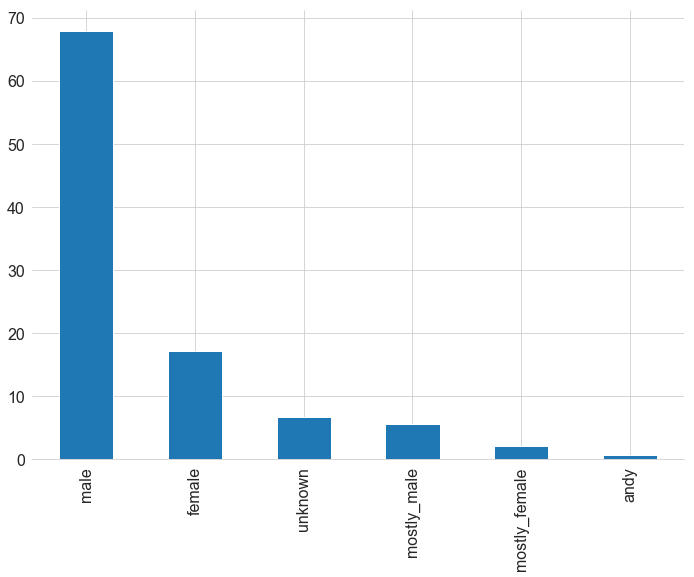

In [180]:
pdf = people.gender.value_counts(normalize=True) * 100
pdf.plot(kind="bar")
sns.despine(left=True, right=True, top=True)

In [107]:
people.Name.value_counts().head(10).to_frame("Occurences")

,Occurences
Richard Curtis,7
Matthew Vaughn,6
Kevin Smith,6
Ryan Reynolds,5
Robert Zemeckis,5
Taika Waititi,4
Joel Coen,4
Ethan Coen,4
Christopher Lloyd,4
Dwayne Johnson,4


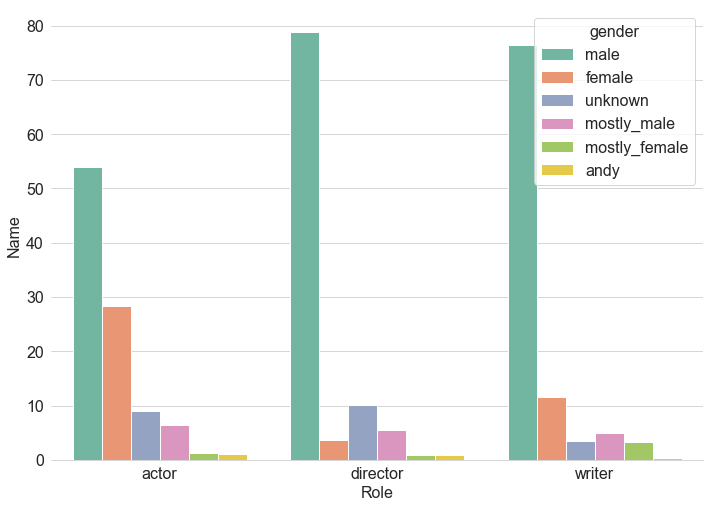

In [185]:
pdf = people.groupby(["Role", "gender"])['Name'].count()
pdf = 100*pdf.div(people.groupby("Role")['Name'].count())
sns.barplot(x="Role", hue="gender", y="Name", data=pdf.reset_index(), hue_order=people.gender.value_counts().keys(), palette="Set2")
sns.despine(top=True, left=True, right=True)

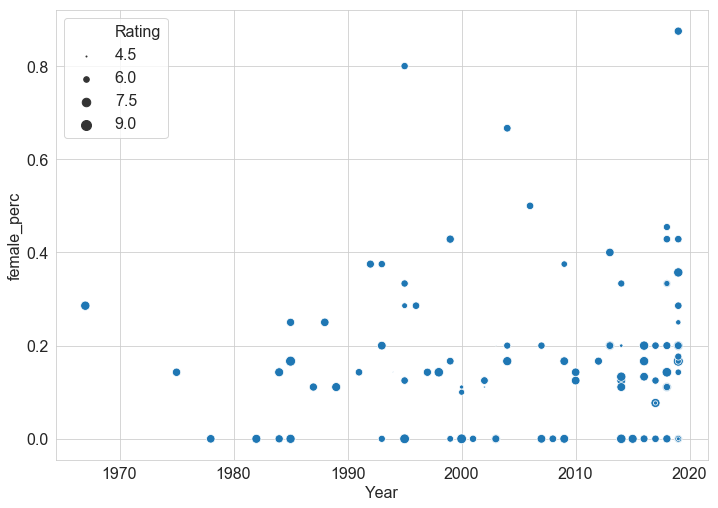

In [179]:
sns.scatterplot(x="Year", size="Rating", y="female_perc", data=movies, sizes=(1, 100))

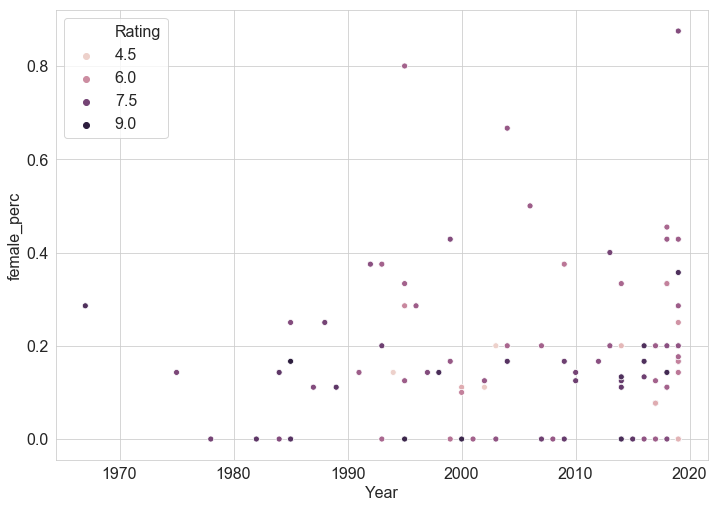

In [188]:
sns.scatterplot(hue="Rating", x="Year", y="female_perc", data=movies)